In [51]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.linalg

In [233]:
def plot_filled_polygon(X, ax=None, **kwargs):
    if ax is None:
        ax = plt.gca()
    I = np.argsort(np.arctan2(X[:,1], X[:,0]))
    ax.fill(*X[I].T, **kwargs)
    

def fuzzy_less(a, b):
    return np.logical_or(a <= b, np.isclose(a, b))


def fuzzy_greater(a, b):
    return np.logical_or(a >= b, np.isclose(a, b))


def inc_seqs(n, k):
    if k > n:
        return []
    if k == 1:
        return [[i] for i in range(n)]
    seqs = [[0, *[s + 1 for s in S]] for S in inc_seqs(n - 1, k - 1)]
    seqs.extend([[s + 1 for s in S] for S in inc_seqs(n - 1, k)])
    return seqs


def plane(X):
    m, n = X.shape
    if m != n:
        raise ValueError("Number of points must equal ambient dimension.")
    x = X[0]
    Y = X[1:] - x.reshape(1, n)
    a = scipy.linalg.null_space(Y).squeeze()
    assert len(a.shape) == 1
    b = x @ a
    if b < 0:
        a = -a
        b = -b
    assert np.allclose(X @ a - b, 0)
    return a, b


def points_to_inequalities(X):
    m, n = X.shape
    seqs = inc_seqs(m, n)
    A = []
    B = []
    for I in seqs:
        try:
            a, b = plane(X[I])
        except:
            print(I)
            raise
        if np.alltrue(fuzzy_less(X @ a, b)):
            A.append(a)
            B.append(b)
        if np.alltrue(fuzzy_greater(X @ a, b)):
            A.append(-a)
            B.append(-b)
    A = np.array(A)
    B = np.array(B)
    return A, B


def inequalities_to_points(A, B):
    m, n = A.shape
    seqs = inc_seqs(m, n)
    X = []
    for I in seqs:
        x = np.linalg.inv(A[I]) @ B[I]
        if np.alltrue(fuzzy_less(A @ x, B)):
            X.append(x)
    X = np.array(X)
    return X

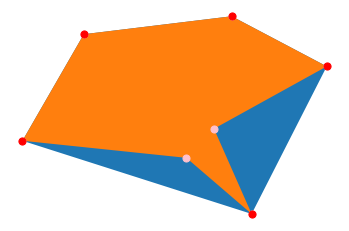

In [234]:
mean = np.zeros(2)
cov = np.identity(2)
np.random.seed(10)
X = np.random.multivariate_normal(mean, cov, size=7)

A, B = points_to_inequalities(X)
XX = inequalities_to_points(A, B)

plot_filled_polygon(XX)
plot_filled_polygon(X)
plt.scatter(*X.T, c="pink", s=50, zorder=99)
plt.scatter(*XX.T, c="red", s=50, zorder=100)
plt.gca().set_axis_off()

In [253]:
n = 3
mean = np.zeros(n)
cov = np.identity(n)
np.random.seed(10)
X = np.random.multivariate_normal(mean, cov, size=10)
A, B = points_to_inequalities(X)
XX = inequalities_to_points(A, B)

In [261]:
m, n = A.shape
seqs = inc_seqs(m, n)[:3]
for I in seqs:
        print(A[I], B[I])
        print()
        x = np.linalg.inv(A[I]) @ B[I]
        if np.alltrue(fuzzy_less(A @ x, B)):
            print(x)
        print()

[[-0.47044192  0.53321894 -0.70310878]
 [-0.52589607  0.15653793 -0.83601985]
 [-0.28238539  0.81310766 -0.50903284]] [0.84155071 0.70367751 0.99223773]

[ 1.3315865   0.71527897 -1.54540029]

[[-0.47044192  0.53321894 -0.70310878]
 [-0.52589607  0.15653793 -0.83601985]
 [ 0.99651082  0.08314038  0.00733903]] [0.84155071 0.70367751 1.37506718]

[ 1.3315865   0.71527897 -1.54540029]

[[-0.47044192  0.53321894 -0.70310878]
 [-0.52589607  0.15653793 -0.83601985]
 [ 0.98804261  0.14944924  0.03790408]] [0.84155071 0.70367751 1.36398513]

[ 1.3315865   0.71527897 -1.54540029]



In [236]:
AA, BB = points_to_inequalities(XX)

[0, 1, 3]


AssertionError: 

In [237]:
XX[[0, 1, 3]]

array([[ 1.3315865 ,  0.71527897, -1.54540029],
       [ 1.3315865 ,  0.71527897, -1.54540029],
       [-0.00838385,  0.62133597, -0.72008556]])

In [252]:
fuzzy_less(A @ X.T, B.reshape(-1, 1))

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True, 

In [251]:
B.shape

(12,)

In [249]:
X.shape

(10, 3)